<a href="https://colab.research.google.com/github/shivam-kislay/Python-Codes/blob/master/ShivamKislayAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## **Dense Layer Models**

**Encoder**

Single Hidden Layer Encoder

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

Two Hidden Layer Encoder

In [0]:
class Encoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_two, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        activation = self.hidden_layer2(layer1)
        return self.output_layer(activation)

Three Hidden layer Encoder

In [0]:
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Decoder**

Single Layer Decoder

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

Double Layer Decoder

In [0]:
class Decoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_two, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        # layer1 = self.hidden_layer(code)
        activation = self.hidden_layer2(code)
        return self.output_layer(activation)

Three layer Decoder

In [0]:
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Auto Encoder Model**
Total of 3 dense layer models are made with 1, 2 and 3 hidden layers repectively.

Auto Encoder Model for 1 layer

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder Model for 2 layers

In [0]:
class Autoencoder_two(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_two, self).__init__()
    self.loss = []
    self.encoder = Encoder_two(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_two(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder for 3 layers

In [0]:
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Loss Function**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward Pass Optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Training Loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process Data Set**

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

**Train Model**

Model with 1 layer

In [70]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.211949348449707
Epoch 2/100. Loss: 5.5804338455200195
Epoch 3/100. Loss: 5.065680980682373
Epoch 4/100. Loss: 4.759706497192383
Epoch 5/100. Loss: 4.621474266052246
Epoch 6/100. Loss: 4.494821548461914
Epoch 7/100. Loss: 4.415714740753174
Epoch 8/100. Loss: 4.362513542175293
Epoch 9/100. Loss: 4.284168243408203
Epoch 10/100. Loss: 4.194498538970947
Epoch 11/100. Loss: 4.161027908325195
Epoch 12/100. Loss: 4.132817268371582
Epoch 13/100. Loss: 4.109922885894775
Epoch 14/100. Loss: 4.110405445098877
Epoch 15/100. Loss: 4.104510307312012
Epoch 16/100. Loss: 4.084884166717529
Epoch 17/100. Loss: 4.045327186584473
Epoch 18/100. Loss: 4.04256010055542
Epoch 19/100. Loss: 4.01011323928833
Epoch 20/100. Loss: 4.001903057098389
Epoch 21/100. Loss: 4.024695873260498
Epoch 22/100. Loss: 4.00106954574585
Epoch 23/100. Loss: 3.9826512336730957
Epoch 24/100. Loss: 4.0020647048950195
Epoch 25/100. Loss: 4.002832889556885
Epoch 26/100. Loss: 4.0010881423950195
Epoch 27/100. Loss: 

Model With Two Layer

In [71]:
model2 = Autoencoder_two(intermediate_dim=128, original_dim=784)
#print(model2)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.44707202911377
Epoch 2/100. Loss: 6.821383953094482
Epoch 3/100. Loss: 6.310756683349609
Epoch 4/100. Loss: 6.107457160949707
Epoch 5/100. Loss: 5.906979560852051
Epoch 6/100. Loss: 5.7937331199646
Epoch 7/100. Loss: 5.747697830200195
Epoch 8/100. Loss: 5.69822359085083
Epoch 9/100. Loss: 5.642734527587891
Epoch 10/100. Loss: 5.639204025268555
Epoch 11/100. Loss: 5.596526622772217
Epoch 12/100. Loss: 5.547628402709961
Epoch 13/100. Loss: 5.501645565032959
Epoch 14/100. Loss: 5.487557888031006
Epoch 15/100. Loss: 5.4994378089904785
Epoch 16/100. Loss: 5.473109245300293
Epoch 17/100. Loss: 5.4649763107299805
Epoch 18/100. Loss: 5.4622321128845215
Epoch 19/100. Loss: 5.4244842529296875
Epoch 20/100. Loss: 5.467480659484863
Epoch 21/100. Loss: 5.431796073913574
Epoch 22/100. Loss: 5.412895679473877
Epoch 23/100. Loss: 5.404770851135254
Epoch 24/100. Loss: 5.423161029815674
Epoch 25/100. Loss: 5.388189315795898
Epoch 26/100. Loss: 5.398029804229736
Epoch 27/100. Loss: 

Model With three layers

In [72]:
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 15.671088218688965
Epoch 2/100. Loss: 7.906261920928955
Epoch 3/100. Loss: 6.9868950843811035
Epoch 4/100. Loss: 6.496817111968994
Epoch 5/100. Loss: 6.104355335235596
Epoch 6/100. Loss: 5.877529621124268
Epoch 7/100. Loss: 5.69471549987793
Epoch 8/100. Loss: 5.514219760894775
Epoch 9/100. Loss: 5.364786148071289
Epoch 10/100. Loss: 5.308300018310547
Epoch 11/100. Loss: 5.2607197761535645
Epoch 12/100. Loss: 5.086901664733887
Epoch 13/100. Loss: 5.071102142333984
Epoch 14/100. Loss: 5.021673679351807
Epoch 15/100. Loss: 4.964042663574219
Epoch 16/100. Loss: 4.9307074546813965
Epoch 17/100. Loss: 4.879746913909912
Epoch 18/100. Loss: 4.788881301879883
Epoch 19/100. Loss: 4.8145976066589355
Epoch 20/100. Loss: 4.783612251281738
Epoch 21/100. Loss: 4.74472713470459
Epoch 22/100. Loss: 4.7425923347473145
Epoch 23/100. Loss: 4.670446395874023
Epoch 24/100. Loss: 4.649517059326172
Epoch 25/100. Loss: 4.643033981323242
Epoch 26/100. Loss: 4.577188491821289
Epoch 27/100. Los

**Predictions**

Predicton for 1 hidden layer model

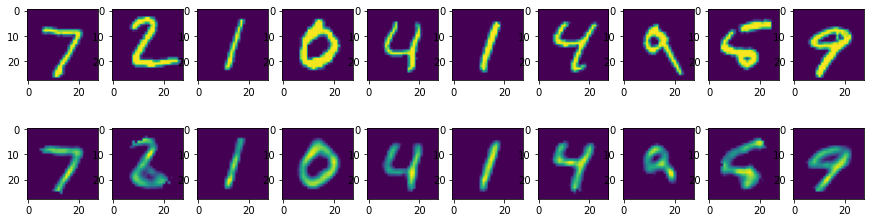

In [73]:
out1 = model.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out1[i].reshape(28,28))

plt.show()

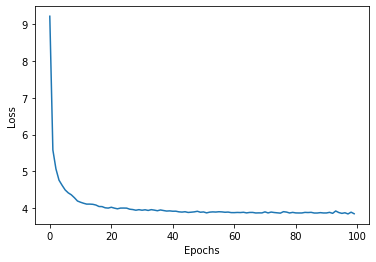

In [74]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction for 2 hidden layer model

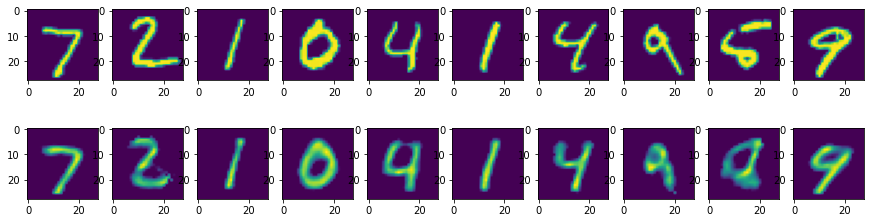

In [75]:
out2 = model2.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out2[i].reshape(28,28))

plt.show()

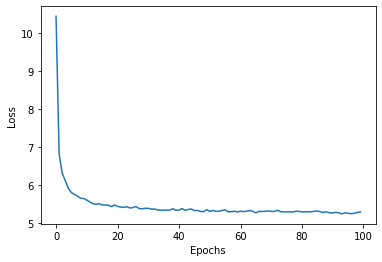

In [76]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions for 3 hidden layer Model

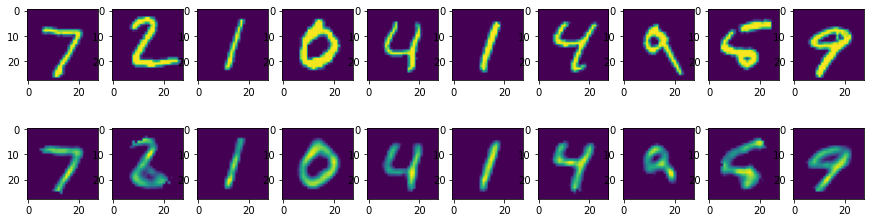

In [77]:
out2 = model.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out2[i].reshape(28,28))

plt.show()

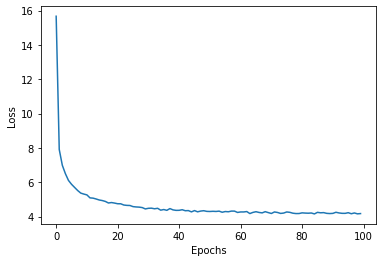

In [78]:
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

From the Model Loss and Predictions, it can be noticed that the model with 3 hidden layer is performing the best. Since we are reducing the size of the layer. Since the dimensions decrease the data loss while decoding is also more. Thus, accuracy is better for 1 hidden layer model in this case.

## **CNN models**

In [18]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 8)           0   

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [22]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6942 - val_loss: 0.6929
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6916 - val_loss: 0.6902
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6885 - val_loss: 0.6867
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6841 - val_loss: 0.6811
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6763 - val_loss: 0.6702
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6576 - val_loss: 0.6388
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5920 - val_loss: 0.5345
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5050 - val_loss: 0.4968
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4871 - val_loss: 0.4858
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4770 - val_lo

In [0]:
out_img = autoencoder.predict(x_test)

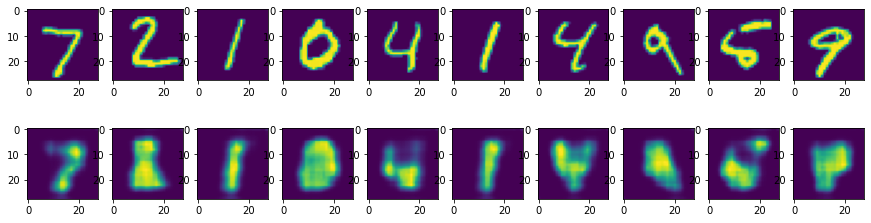

In [24]:
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img[i].reshape(28,28))

plt.show()

Complex CNN

In [25]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#(2,2,8)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded) #(2,2,8)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(4,4,8)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) #(4,4,16)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(8,8,16)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) #(8,8,32)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(16,16,32)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 8)           0   

In [26]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.6934 - val_loss: 0.6923
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.6908 - val_loss: 0.6891
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.6859 - val_loss: 0.6808
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.6715 - val_loss: 0.6605
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.6431 - val_loss: 0.6215
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.5830 - val_loss: 0.5349
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.4792 - val_loss: 0.4463
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.4333 - val_loss: 0.4300
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.4196 - val_loss: 0.4168
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.4057 - val_l

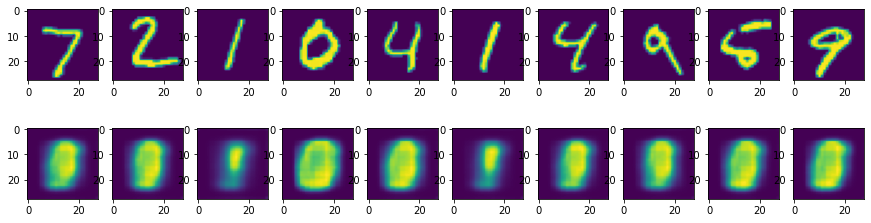

In [27]:
out_img2 = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img2[i].reshape(28,28))

plt.show()

In [28]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same')(input_img)
x = x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
# Batch normalization
bnd = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(bnd)
encoded_dense = tf.keras.layers.Dense(64, activation=tf.nn.relu)(encoded)
#(2,2,8)
# at this point the representation is (2, 2, 8) i.e. 128-dimensional

x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(encoded_dense)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x) #(2,2,8)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(4,4,8)
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(x) #(4,4,16)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(8,8,16)
x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x) #(8,8,32)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(16,16,32)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x) # (14,16,16)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #(28,28,16)
bnd = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(bnd) #(28,28,1)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 16)        12816     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 8)           3208      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 8)           0   

In [30]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1194 - val_loss: 0.1170
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1125 - val_loss: 0.1079
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1084 - val_loss: 0.1068
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1055 - val_loss: 0.1031
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1041 - val_loss: 0.1061
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1023 - val_loss: 0.1012
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1005 - val_loss: 0.0980
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0995 - val_loss: 0.0970
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0986 - val_loss: 0.0987
Epoch 10/100
469/469 [==============================] - 6s 13ms/step - loss: 0.097

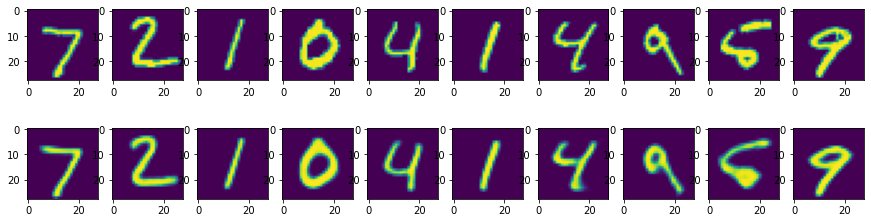

In [31]:
out_img3 = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(15,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_img3[i].reshape(28,28))

plt.show()